# Plots representing the results of the analysis
Link to data used: https://drive.google.com/file/d/1UJomSVPj9S-hx_2ShZ7f6zdxXE6sxyWA/view?usp=sharing
This file was used in google colab. If you want to use it, change the path to the file.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_to_load = "./drive/MyDrive/Sentimental_Analysis/processed_data(textblob)_noneutral_alldata.parquet"

In [4]:
df = pd.read_parquet(file_to_load)
df

,polarity,subjectivity,extractedts
0,-0.875000,1.000000,2022-02-24 06:51:09.665136
1,-0.077778,0.144444,2022-02-24 06:51:09.682319
2,-0.037727,0.180909,2022-02-24 06:51:09.732106
3,0.100000,0.400000,2022-02-24 06:51:09.746099
4,-0.155556,0.288889,2022-02-24 06:51:09.816932
...,...,...,...
28703119,0.226667,0.285000,2023-06-14 15:28:05.139321
28703120,-0.261905,0.500000,2023-06-14 15:28:05.636928
28703121,0.015909,0.457792,2023-06-14 15:28:05.751305
28703122,-0.050000,0.160000,2023-06-14 15:28:06.037166


Text(0.5, 1.0, 'Histogram of polarity values')

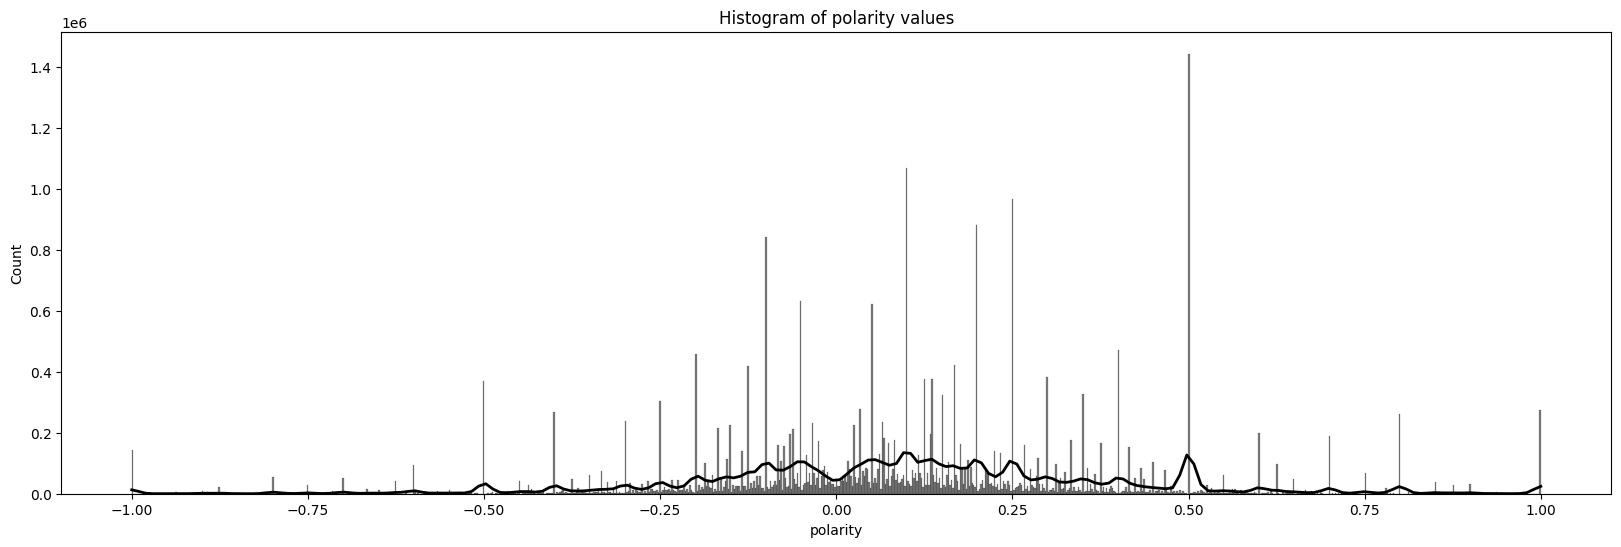

In [15]:
#create a histogram of polarity values with kde
plt.figure(figsize=(20,6))
sns.histplot(data=df, x="polarity", kde=True, color="black", line_kws={"linewidth": 2})
plt.title("Histogram of polarity values")


Text(0.5, 1.0, 'Histogram of subjectivity values')

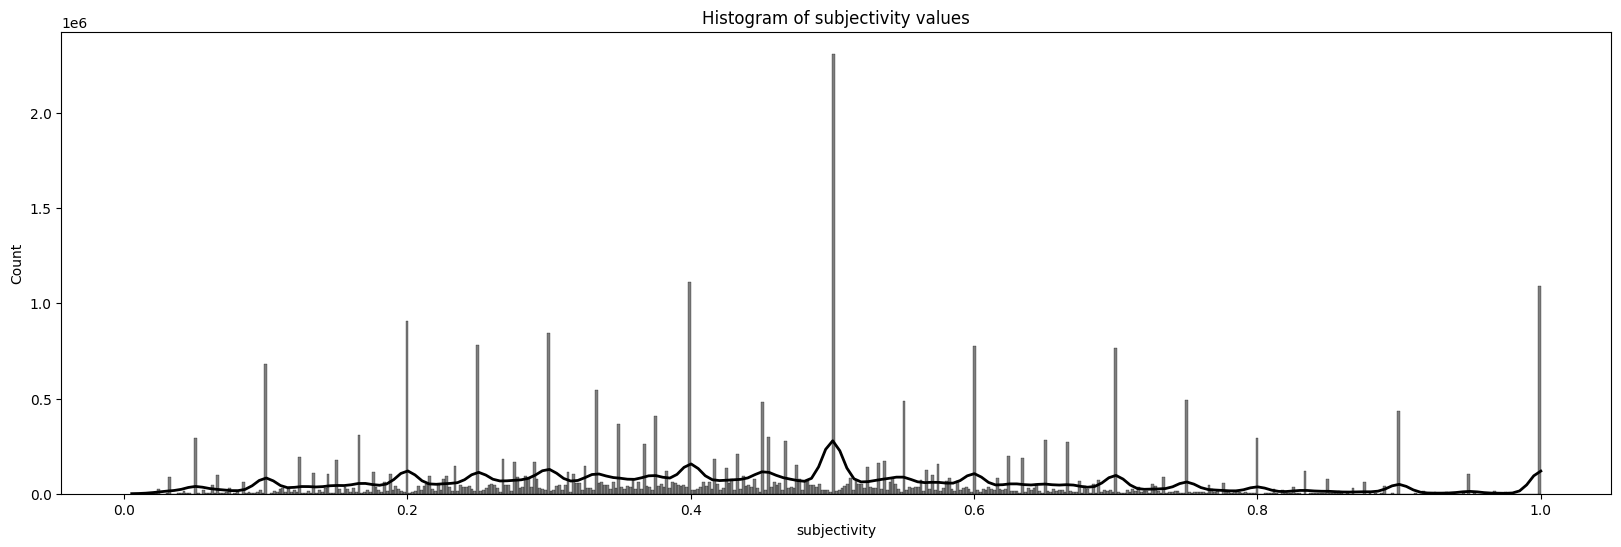

In [16]:
#create a histogram of subjectivity values with kde
plt.figure(figsize=(20,6))
sns.histplot(data=df, x="subjectivity", kde=True, color="black", line_kws={"linewidth": 2})
plt.title("Histogram of subjectivity values")


Number of tweets: 28,703,124
First tweet: 2022-02-24 06:51:09.665136
Last tweet: 2023-06-14 15:28:06.262686
This covers a period of: 475 days 08:36:56.597550


Text(0.5, 1.0, 'Number of tweets per hour')

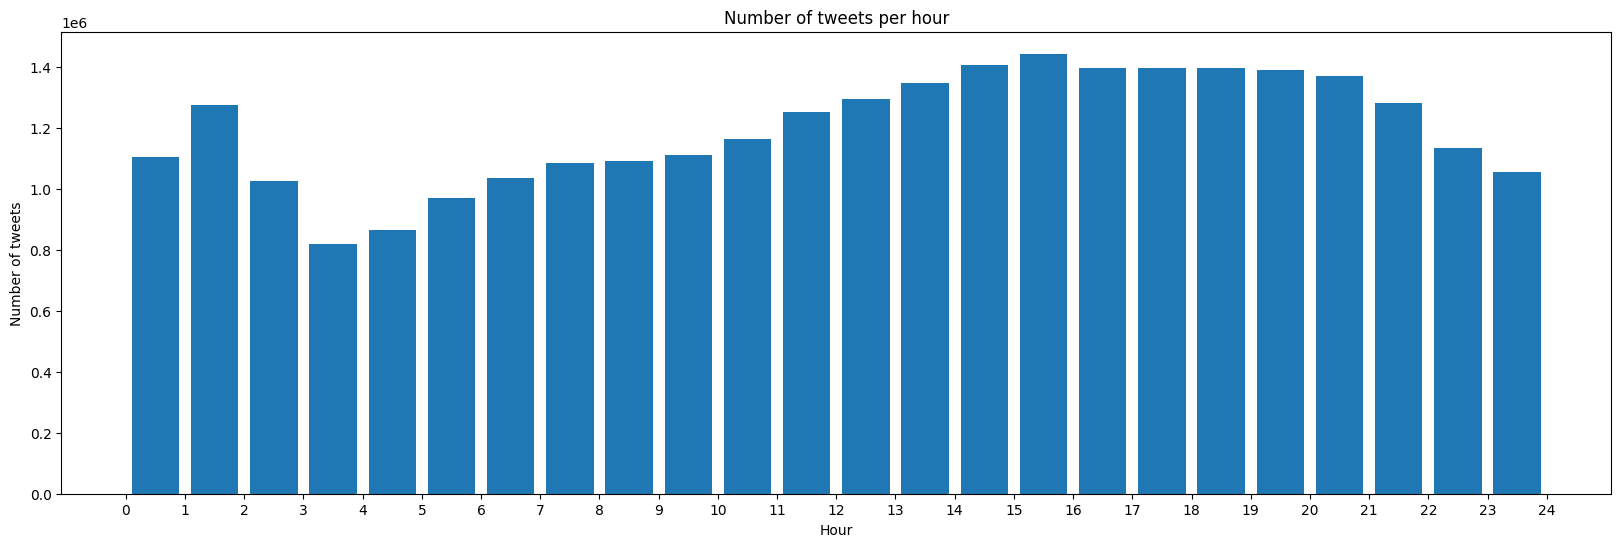

In [12]:
print("Number of tweets:", f"{len(df):,}")
print("First tweet:", df["extractedts"].min())
print("Last tweet:", df["extractedts"].max())
print("This covers a period of:", df["extractedts"].max() - df["extractedts"].min())

#show numbers of tweets per hour in histogram use 24 bins and set the x axis to 24 hours (0-23), rotate, center them to the middle of the bin
plt.figure(figsize=(20, 6))

plt.hist(df["extractedts"].dt.hour, bins=24, rwidth=0.8, range=(0, 24))
#show 24 ticks for all hours and center them to the middle of the bin
plt.xticks(range(25), ha="center")
plt.xlabel("Hour")
plt.ylabel("Number of tweets")
plt.title("Number of tweets per hour")


Text(0.5, 1.0, 'Number of tweets per day')

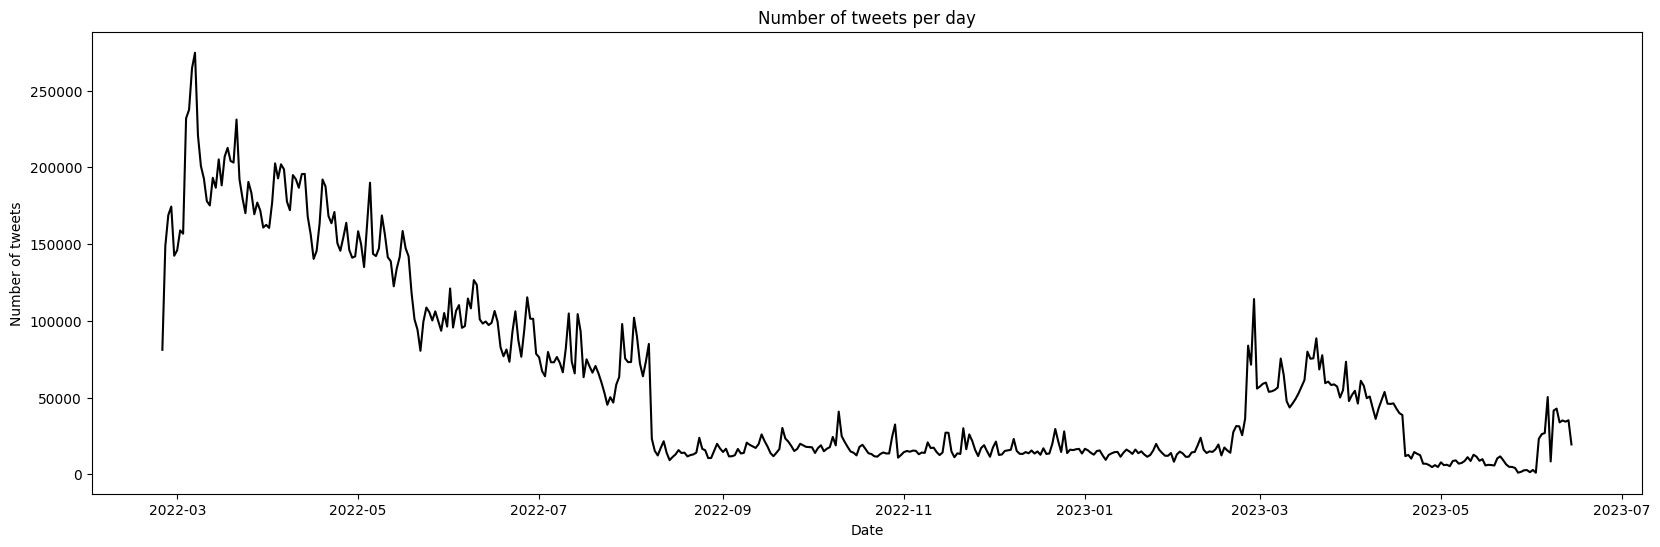

In [13]:
#show numbers of tweets per day over time
df["extractedts"].dt.date.value_counts().plot(figsize=(20, 6), color = "black", linewidth=1.5)
plt.xlabel("Date")
plt.ylabel("Number of tweets")
plt.title("Number of tweets per day")

In order to show average statistics per day from now on date is limited to day accuracy

In [5]:
df["extractedts"] = df["extractedts"].dt.date


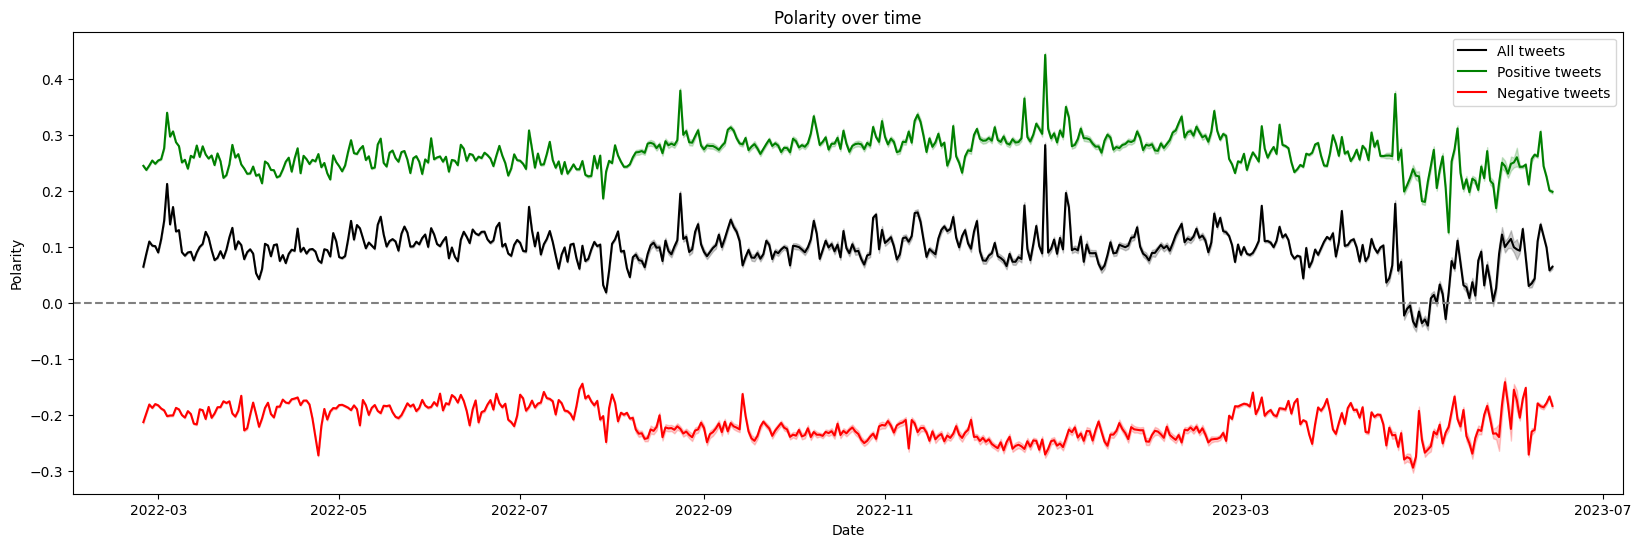

In [19]:
#create a plot that will show the polarity over time
plt.figure(figsize=(20, 6))
sns.lineplot(x="extractedts", y="polarity", data=df, c = "black", label="All tweets")
sns.lineplot(x="extractedts", y="polarity", data=df[df["polarity"] > 0], c = "green", label="Positive tweets")
sns.lineplot(x="extractedts", y="polarity", data=df[df["polarity"] < 0], c = "red", label="Negative tweets")
#add grey abline at 0 to show neutral values
plt.axhline(y=0, color='grey', linestyle='--')
plt.title("Polarity over time")
plt.ylabel("Polarity")
plt.xlabel("Date")
plt.legend()


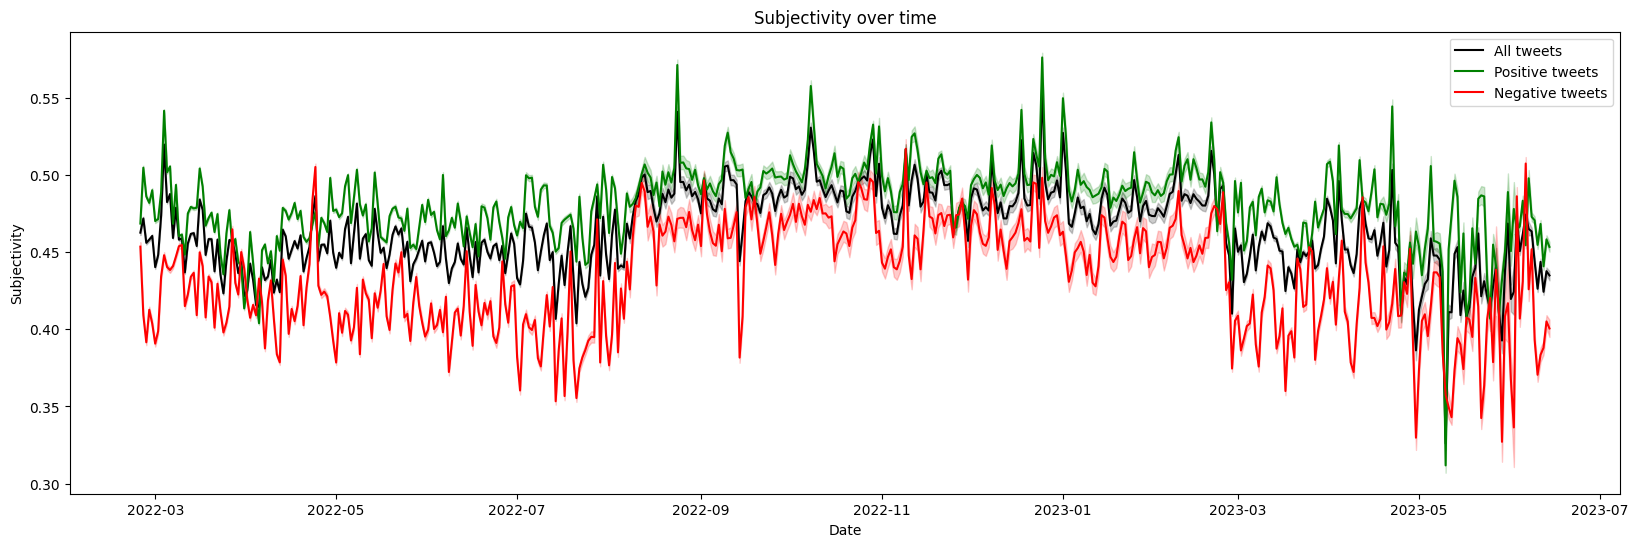

In [6]:
#create a plot that will show the subjectivity over time
plt.figure(figsize=(20, 6))
sns.lineplot(x="extractedts", y="subjectivity", data=df, c = "black", label="All tweets")
sns.lineplot(x="extractedts", y="subjectivity", data=df[df["polarity"] > 0], c = "green", label="Positive tweets")
sns.lineplot(x="extractedts", y="subjectivity", data=df[df["polarity"] < 0], c = "red", label="Negative tweets")

plt.title("Subjectivity over time")
plt.ylabel("Subjectivity")
plt.xlabel("Date")
plt.legend()


CORELATIONS:
Polarity and subjectivity: 0.5130875153997184
Polarity and tweet count: 0.15481266602690455
Subjectivity and tweet count: -0.3183470200142879


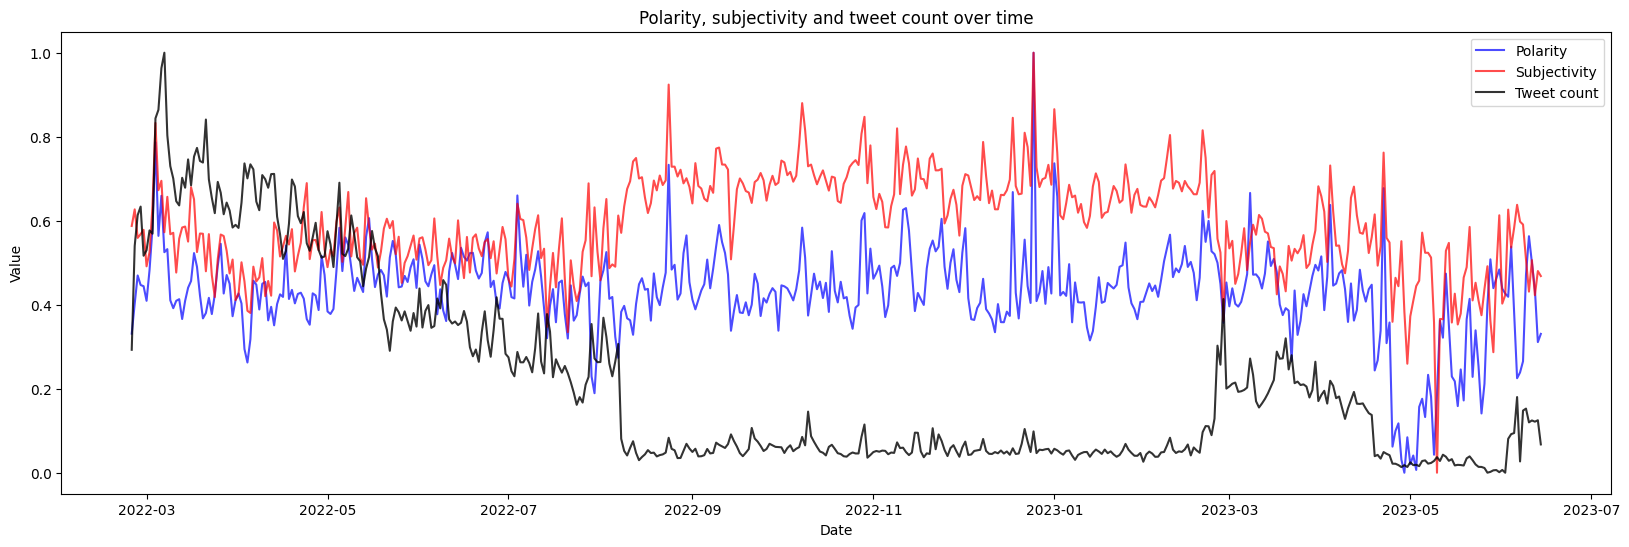

In [20]:
#create new dataframe with polarity and subjectivity and count of tweets per day
df2 = df.groupby("extractedts").agg({"polarity": "mean", "subjectivity": "mean", "extractedts": "count"})
df2.rename(columns={"extractedts": "count"}, inplace=True)
df2.reset_index(inplace=True)

#normalize all values to range 0-1
df2["polarity"] = (df2["polarity"] - df2["polarity"].min()) / (df2["polarity"].max() - df2["polarity"].min())
df2["subjectivity"] = (df2["subjectivity"] - df2["subjectivity"].min()) / (df2["subjectivity"].max() - df2["subjectivity"].min())
df2["count"] = (df2["count"] - df2["count"].min()) / (df2["count"].max() - df2["count"].min())

# Create a figure with a white background and no grid lines
plt.figure(figsize=(20, 6), facecolor='white')

# Plot the lines with reduced opacity and lighter colors
sns.lineplot(x="extractedts", y="polarity", data=df2, c="blue", label="Polarity", alpha=0.7)
sns.lineplot(x="extractedts", y="subjectivity", data=df2, c="red", label="Subjectivity", alpha=0.7)
sns.lineplot(x="extractedts", y="count", data=df2, c="black", label="Tweet count", alpha=0.8)

# Add a title, labels, and legend
plt.title("Polarity, subjectivity and tweet count over time")
plt.ylabel("Value")
plt.xlabel("Date")
plt.legend()

#calculate the correlation between all 3 pairs
print("CORELATIONS:")
print("Polarity and subjectivity:", df2["polarity"].corr(df2["subjectivity"]))
print("Polarity and tweet count:", df2["polarity"].corr(df2["count"]))
print("Subjectivity and tweet count:", df2["subjectivity"].corr(df2["count"]))
